In [7]:
!wget https://github.com/HashamAkram18/Self_Hosted_DB_repo/raw/main/Chicken-fecal-images.zip

--2024-03-20 10:49:01--  https://github.com/HashamAkram18/Self_Hosted_DB_repo/raw/main/Chicken-fecal-images.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HashamAkram18/Self_Hosted_DB_repo/main/Chicken-fecal-images.zip [following]
--2024-03-20 10:49:01--  https://raw.githubusercontent.com/HashamAkram18/Self_Hosted_DB_repo/main/Chicken-fecal-images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044554 (9.6M) [application/zip]
Saving to: ‘Chicken-fecal-images.zip’

Chicken-fecal-image 100%[===================>]   9.58M  --.-KB/s    in 0.03s   

2024-03-20 10:49:02 (351 MB/s) - ‘Chi

In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/Chicken-fecal-images.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [42]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [43]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16


from keras.preprocessing.image import (ImageDataGenerator,
                                       array_to_img,
                                       img_to_array,
                                       load_img)

In [44]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(244,244,3)
)

In [45]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(units=2,activation='softmax'))

In [46]:
conv_base.trainable = False

In [47]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [50]:
def train_valid_generator(data_path: str, augmentation: bool):
    datagenerator_kwargs = dict(rescale=1./255, validation_split=0.2)
    dataflow_kwargs = dict(target_size=(224, 224), batch_size=32, interpolation="bilinear")
    valid_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(**datagenerator_kwargs)
    if augmentation:
        train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            horizontal_flip=True,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2)
        train_generator = train_datagen.flow_from_directory(
            directory=data_path,
            subset="training",
            shuffle=True,
            **dataflow_kwargs)
    else:
        train_generator = valid_datagenerator.flow_from_directory(
            directory=data_path,
            subset="training",
            shuffle=True,
            **dataflow_kwargs)
    valid_generator = valid_datagenerator.flow_from_directory(
        directory=data_path,
        subset="validation",
        shuffle=False,
        **dataflow_kwargs)
    return train_generator, valid_generator

In [51]:
train_generator, validation_generator =train_valid_generator("/content/Chicken-fecal-images", True)

Found 339 images belonging to 2 classes.
Found 67 images belonging to 2 classes.


In [52]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               6422784   
                                                                 
 dense_11 (Dense)            (None, 2)                 514       
                                                                 
Total params: 21137986 (80.64 MB)
Trainable params: 6423298 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [54]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.n // train_generator.batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=validation_generator.n // validation_generator.batch_size)

<ipython-input-54-49c0e2b32b78>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
10/10 [==============================] - 11s 1s/step - loss: 1.5913 - accuracy: 0.6938 - val_loss: 0.6010 - val_accuracy: 0.8281
Epoch 2/10
10/10 [==============================] - 5s 462ms/step - loss: 0.3666 - accuracy: 0.8860 - val_loss: 0.3760 - val_accuracy: 0.8594
Epoch 3/10
10/10 [==============================] - 5s 510ms/step - loss: 0.2470 - accuracy: 0.9121 - val_loss: 0.2348 - val_accuracy: 0.9219
Epoch 4/10
10/10 [==============================] - 6s 560ms/step - loss: 0.1245 - accuracy: 0.9500 - val_loss: 0.1742 - val_accuracy: 0.9375
Epoch 5/10
10/10 [==============================] - 5s 483ms/step - loss: 0.1504 - accuracy: 0.9381 - val_loss: 0.1601 - val_accuracy: 0.9531
Epoch 6/10
10/10 [==============================] - 5s 527ms/step - loss: 0.0968 - accuracy: 0.9674 - val_loss: 0.1430 - val_accuracy: 0.9531
Epoch 7/10
10/10 [==============================] - 5s 475ms/step - loss: 0.0971 - accuracy: 0.9642 - val_loss: 0.1084 - val_accuracy: 0.9531
Epoch 8/

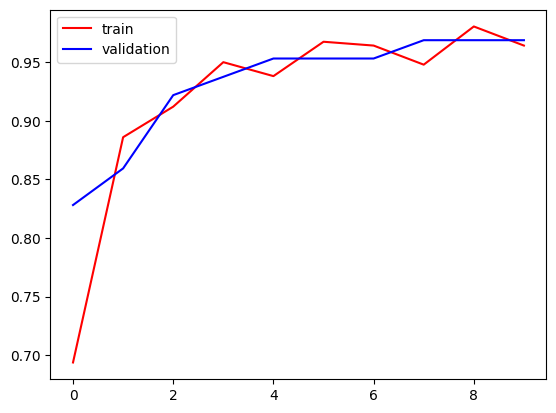

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

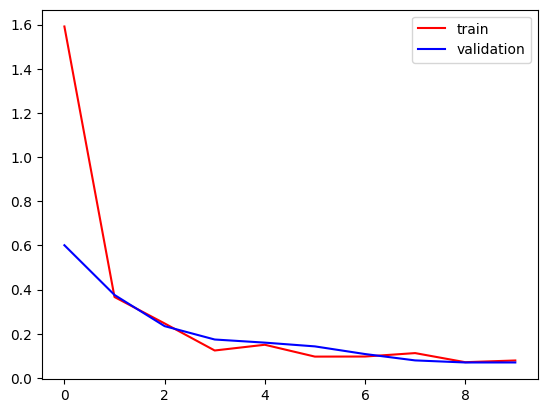

In [56]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [58]:
model.save("chicken_disease_classifier.keras")